<font size="5" color="red"><b>ch4. 머신러닝 모형 최적화</b></font>
# 1절. 변수 선택과 차원 축소
## 1-1 변수선택과 차원축소
- 종속변수에 영향을 주는 변수들을 찾아 학습에 사용할 독립변수의 수를 줄임 (어떻게 하면 score를 높일 수 있을지?)
- 과적합과 변수들 사이의 다중공선성(변수들간 강한 상관관계)을 줄일 수 있음 
    * 회귀계수 해석이 어려워짐. 모델 예측력이 좋아도 해석력이 떨어짐(어떤 변수가 제일 큰 요인인지 잘), p값이나 유의성 검정이 왜곡될 수 있음-모형의 학습 시간을 줄일 수 있음-주성분분석, 상관분석, **분류모형의 feature_importance_, 예측 모형의 coef_**-SelectKBest : 가장 높은 score에 따라 K개의 특징을 선택
## 1-2 주성분분석(PCA, Principal Component Anaysis)-주성분분석은 변수 선택 및 차원축소 방법(기존의 모든 변수를 조합하여 새로운 변수로 만듦) 으로 널리 사용-주성분 분석은 상관관계가 있는 변수들을 선형결합해서 
**분산이 극대화된 상관관계가 없는 새로운 변수(주성분)들로 축약**하는 것-주성분 분석은 사실 선형대수학이라기보다는 선형대수학의 활용적인 측면이 강하며 영상인식, 통계 데이터분석(주성분 찾기), 데이터 압축, 노이즈제거 등 여러 분야에 사용-영상처리에서 많이 활용 : 여러개의 영상 중 대표 이미지를 찾을 때 활용

In [3]:
import seaborn as sns
from sklearn.decomposition import PCA
iris = sns.load_dataset('iris')
iris.head()
iris_X, iris_y = iris.iloc[:,:-1], iris.iloc[:,-1]
iris_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
pca = PCA(n_components=2)
pca.fit(iris_X)
iris_pca = pca.transform(iris_X)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [7]:
# 각 주성분의 계수 : 각 주성분이 원래 특성들과 어떤 관계가 있는지 나타내는 가중치
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [8]:
# 설명분산 : 각 주성분 벡터가 종벼량을 얼마나 표현하는지(설명하는지
pca.explained_variance_

array([4.22824171, 0.24267075])

In [9]:
# 설명분산을 0~1사이의 비율로 조정된 설명정도 : 주성분 결과 특성은 97.75852%
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 1-3 상관관겨 확인
- 각 변수들끼리의 상관관계 확인(시간화), 종속변수와 상관관계가 놀은 변수들만 선택


In [10]:
import pandas as pd
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
corr = redwine.corr()
# 상관관계 결과를 시각화


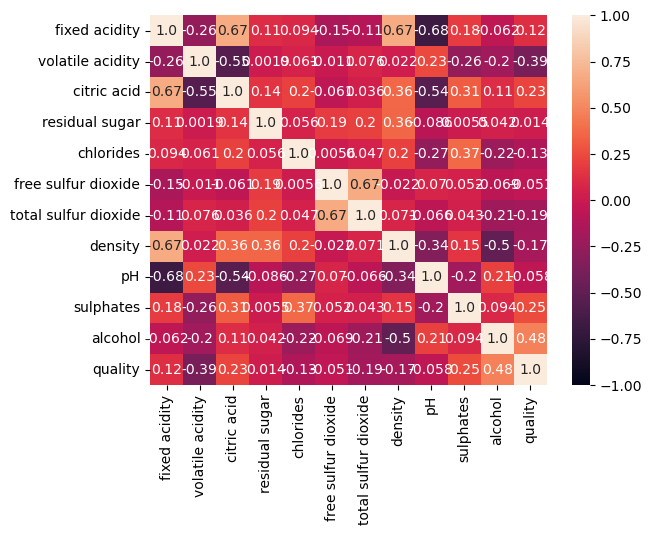

In [20]:
import matplotlib.pyplot as plt
import numpy as np

sns.heatmap(corr, annot=True, fmt='.2', vmin=-1, vmax=1)
plt.show()

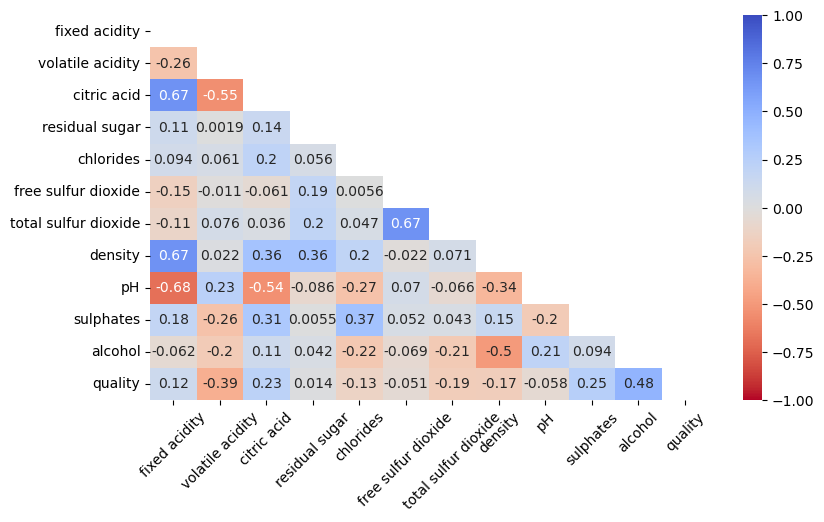

In [46]:
plt.figure(figsize=(9,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt='.2', vmin=-1, vmax=1, mask=mask, cmap='coolwarm_r' )
plt.xticks(rotation=45)
plt.show()

## 1-4 분류모형의 Feature_importance_
- 분류모형의 feature_importanace 속성은 각 독립변수들이 종속변수에 영향을 주는 정도
- LogisticRegression이나 SVC, MLP, GaussianNB등은 feature_importance_가 없음
- 그 외의 분류모형은 사용가능

In [49]:
from sklearn.model_selection import train_test_split
X = redwine.iloc[:,:-1]
y = redwine.iloc[:,-1]
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10) # 트리 갯수 10개
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10)

In [51]:
rf_model.feature_importances_

array([0.07862052, 0.10823456, 0.07329542, 0.06793175, 0.08606275,
       0.07791346, 0.11109687, 0.07737522, 0.07544445, 0.10603518,
       0.13798983])

In [55]:
features = pd.DataFrame(data= np.c_[X.columns, rf_model.feature_importances_],
                        columns=['feature','importance'])
features['importance'].sum()                        

1.0

In [65]:
features = features.sort_values(by='importance', ascending=False,).reset_index(drop=True)

### feature_importance_를 이용한 변수 중요도 시각화

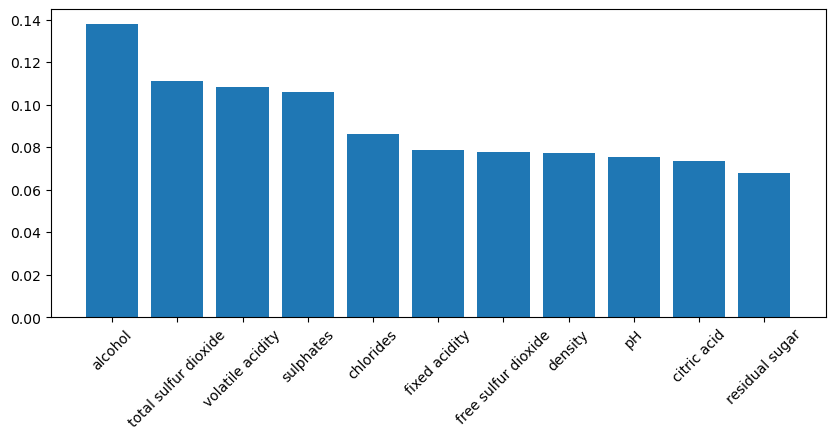

In [ ]:
plt.figure(figsize=(10,4))
plt.bar(features.feature, features.importance)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [ ]:
# features.importance 누적합
# l = [1, 2, 3]
# np.cumsum(l)
y_stack = np.cumsum(features.importance)
np.c_[features.importance, y_stack]

array([[0.1379898318465757, 0.1379898318465757],
       [0.11109687005498899, 0.24908670190156468],
       [0.10823456238167486, 0.3573212642832395],
       [0.1060351790991358, 0.4633564433823753],
       [0.08606274701358972, 0.549419190395965],
       [0.07862051561504238, 0.6280397060110073],
       [0.07791345546523215, 0.7059531614762395],
       [0.0773752186830061, 0.7833283801592457],
       [0.07544444811013344, 0.8587728282693791],
       [0.07329542334390393, 0.932068251613283],
       [0.06793174838671694, 0.9999999999999999]], dtype=object)

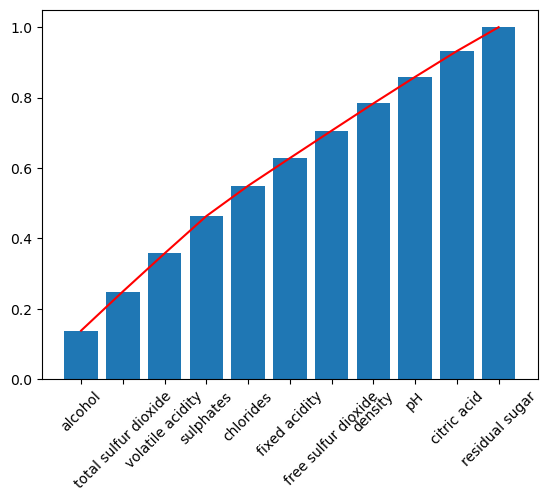

In [83]:
# 누적합을 이용하여 시각화
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color='red')
plt.xticks(rotation=45)
plt.show()

### RFE(Recursive Feature Elimination) 방식
- RFE 클래스를 이용 : 중요도에 따라 즁요도가 낮은 변수부터 하나씩 제거해 가면서 최종 선택된 변수 개수만큼 중요도가 높은 변수를 찾는다

In [85]:
# 5개 특징이 남을 때까지 변수를 제거(기준:feature_importances_)
from sklearn.feature_selection import RFE
rfe = RFE(rf_model,
          n_features_to_select=5)
rfe.fit(train_X,train_y)          
rfe.get_support()

array([False,  True, False, False,  True, False,  True, False, False,
        True,  True])

In [88]:
features_rfe = pd.DataFrame( np.c_[X.columns, rfe.get_support()],
                            columns=['feature','selected'])
features_rfe[features_rfe.selected == True]                            

,feature,selected
1,volatile acidity,True
4,chlorides,True
6,total sulfur dioxide,True
9,sulphates,True
10,alcohol,True


## 1-5 SelectKBest
- 가장 높은 score에 따라 k개 feature 선택

In [96]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
X.shape, y.shape, type(X), type(y)

((150, 4), (150,), numpy.ndarray, numpy.ndarray)

In [97]:
features_name = iris.columns[:-1].tolist()
features_name

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
# 가장 중요한 feature 1개 추출
# f_classof : y는 범주형, x는 연속형
# chi2 : y는 범주형, x는 범주형, 양의 실수
# mutual_info : 비선형 데이터 고려
X_new = SelectKBest(f_classif, # x가 연속형
                    k=1, # 추출된 feature의 갯수
                    ).fit_transform(X,y)
X_new[:3]

array([[1.4],
       [1.4],
       [1.3]])

# 2절 파라미터 선택
- 하이퍼파라미터(사용자가 직접 설정할 수 있는 파라미터). 최적의 결과를 내는 하이퍼파라미터값?
    1. validation_curve() : 단일 하이퍼 파라미터 최적화 함수
    2. GridSearchCV() : 복수 하이퍼 파라미터 최적화 클래스(가장 높은 score를 내는 모형까지 찾아줌)

## 2-1 validation_curve()
- param_name, param_range(리스트), scoring(성능기준지표) 매개변수로 받아 최적의 성능 계산

In [106]:
# 데이터
from sklearn.datasets import load_digits
digits = load_digits()
# digits.data.shape : (1797, 64) 배열 (타겟변수)
# digits.images.shape : (1797, 8, 8) 배열
# digits.target.shape : (1797) 열 배열 (타겟변수)
# digits.target_names : 타겟변수 내용
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [107]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

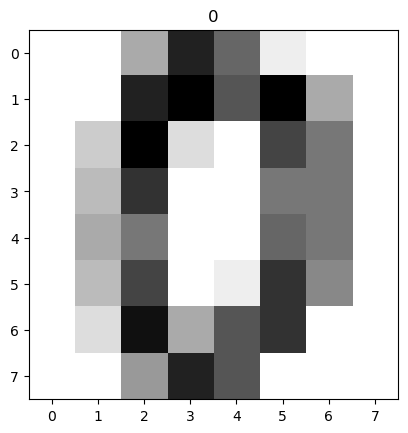

In [115]:
plt.imshow(X[0].reshape(8,8), cmap='gray_r')
plt.title(y[0])
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(probability=True,) # probability=True : 판별모형이라도 proba 가능 
model.fit(X,y)

SVC(probability=True)

In [121]:
model.predict(X[0].reshape(1,-1))

array([0])

In [123]:
# 예측확률
print(model.classes_)
print(model.predict_proba(X[0].reshape(1,-1)))

[0 1 2 3 4 5 6 7 8 9]
[[9.91364931e-01 1.89673417e-04 4.65012199e-04 8.49520339e-04
  6.28248221e-04 1.33327797e-03 7.22308365e-04 8.98374730e-04
  7.64602166e-04 2.78405188e-03]]


In [158]:
model.score(X,y)

0.996661101836394

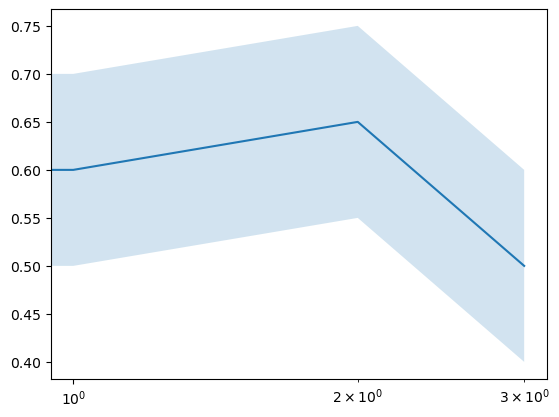

In [127]:
range = np.array([0,1,2,3])
score = np.array([0.5, 0.6, 0.65, 0.5])
plt.semilogx(range,score)
plt.fill_between(range, score-0.1, score+0.1, alpha=0.2)
plt.show()

In [128]:
# SVC() 모형에서 C파라미터 값을 다음의 범위 중 제일 좋은 C값
# 10의 -6승 부터 10의 -1승까지 로그간격으로 균등분포 10개를 추출'
param_range = np.logspace(-6,-1,10)
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [129]:
from sklearn.model_selection import validation_curve
train_score, test_score = validation_curve( 
    SVC(),
    X, y,
    param_name='gamma',
    param_range=param_range, # list로 파라미터 전달
    cv=10, # 교차검증 : 데이터 10개 중 1개씩 test 데이터로 검증하고 평균 score
    scoring='accuracy',
    n_jobs=-1 # 시스템의 모든 core 사용
)

In [133]:
test_score.shape, train_score.shape

((10, 10), (10, 10))

In [150]:
train_score_mean = np.mean(train_score, axis=1) # 행별 평균
test_score_mean = np.mean(test_score, axis=1)
train_score_std = np.std(train_score, axis=1)
test_score_std = np.std(test_score, axis=1)

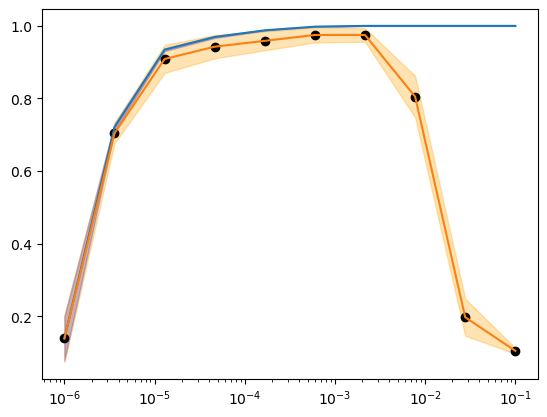

In [156]:
plt.semilogx(param_range, train_score_mean)
plt.fill_between(param_range, 
                 train_score_mean-train_score_std, 
                 train_score_mean+train_score_std, 
                 color='blue', 
                 alpha=0.3)

plt.semilogx(param_range, test_score_mean)
plt.fill_between(param_range, 
                 test_score_mean-test_score_std, 
                 test_score_mean+test_score_std, 
                 color='orange', 
                 alpha=0.3)
plt.scatter(param_range, test_score_mean, c='k')

In [157]:
gammar = param_range[6]
gammar

0.0021544346900318843

In [159]:
model = SVC(gamma=gammar).fit(X,y)
model.score(X,y)

1.0

## 2-2 GridSearchCV
- 복수개의 하이퍼 파라미터 최적화 클래스
- 모형도 가지고 옴
- fit(), score(), predict(), predict_proba(), decision_fuction()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

In [164]:
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [166]:
redwine_X, redwine_y = redwine.iloc[:,:-1], redwine.iloc[:,-1]
redwine_X.shape, redwine_y.shape

((1599, 11), (1599,))

In [169]:
# SelectKBest로 최적의 독립변수 k개 찾음 -> SVC()에서 최적의 C값을 찾음
selection = SelectKBest(k=1) # 가장 평가 점수가 높은 k개 찾음
svc = SVC(kernel='linear') # 직선으로 나누는 가장 단순한 분류모형
pipeline = Pipeline([('select', selection), ('svc', svc)])
param_grid = dict(select__k = [4,5,6,7,8,9,10,11],
        svc__C = [0.1, 1, 10] # 오차 범위 허용 정도(큰C:엄격, 작은C:허용범위 큼)
)
grid_search = GridSearchCV(
                pipeline,
                param_grid=param_grid, # 파라미터들
                cv=2,
                verbose=2, # 로그 출력의 수다스러운 정도
                n_jobs=-1
)
grid_search.fit(redwine_X.values, redwine_y.values)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('select', SelectKBest(k=1)),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'select__k': [4, 5, 6, 7, 8, 9, 10, 11],
                         'svc__C': [0.1, 1, 10]},
             verbose=2)

In [170]:
grid_search.best_params_

{'select__k': 9, 'svc__C': 1}

In [172]:
# 최적의 모형
model = grid_search.best_estimator_
model.score(redwine_X.values, redwine_y.values)

0.5878674171357098

In [ ]:
model = SVC().fit(redwine_X.values, redwine_y.values)
model.score(redwine_X.values, redwine_y.values)

0.5103189493433395

# 3절 자료 불균형 처리
- 단순 언더/오버 샘플링
- 단, 단순 오버샘플링의 경우 소수의 데이터를 복사하면, 과적합 우려
- 오버샘플링하는 방법 : SMOTE
## 3-1 SMOTE를 이용한 오버샘플링 전

In [176]:
# 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000,
                           n_features=10, # 독립변수 갯수
                           n_informative=5,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           n_classes=2,
                           weights=[0.99, 0.01] # 각 클래스의 할당된 표본 할당량
                           )
y.mean()

0.0161

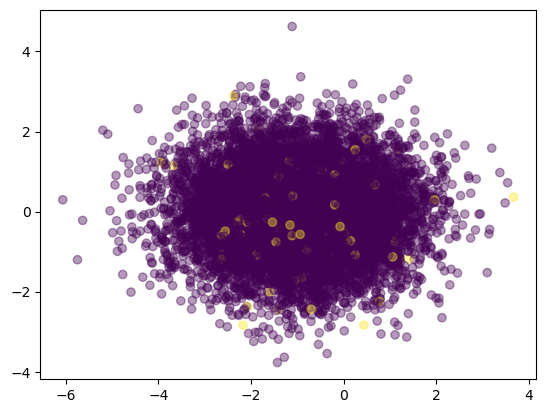

In [177]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.4)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [179]:
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_features=2,
                                  )
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=2)

In [188]:
y_hat = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_hat)

array([[2952,    0],
       [  38,   10]], dtype=int64)

In [189]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2952
           1       1.00      0.21      0.34        48

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.67      3000
weighted avg       0.99      0.99      0.98      3000



## 3-2 SMOTE를 이용한 전체 오버샘플링 후 데이터 셋 분리
- imbalanced-learn 라이브러리 install

In [191]:
# 0그룹과 1그룹의 갯수
df = pd.DataFrame(np.c_[X,y])
df.iloc[:,-1].value_counts()

0.0    9839
1.0     161
Name: 10, dtype: int64

In [197]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy={0:9860, 1:420}) # 0그룹 : 1그룹 = 1:1
X_resample, y_resample = sm.fit_resample(X,y)
X_resample.shape, y_resample.shape

c:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (9860) in class 0 will be larger than the number of samples in the majority class (class #0 -> 9839)
  warnings.warn(


((10280, 10), (10280,))

In [201]:
df = pd.DataFrame(np.c_[X_resample,y_resample])
df.iloc[:,-1].value_counts()

0.0    9860
1.0     420
Name: 10, dtype: int64

In [203]:
train_X, test_X, train_y, test_y = train_test_split(X_resample,y_resample, test_size=0.3, stratify=y_resample)
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_features=2,
                                  )
rf_model.fit(X_train, y_train)
y_hat = rf_model.predict(X_test)
confusion_matrix(y_test, y_hat)

array([[2952,    0],
       [  38,   10]], dtype=int64)

## 3-3 가중치 제어
- 자료 불균형 처리의 또 다른 방법
- sklearn의 예측 모형 중 class_weigh 매개변수 설정

In [204]:
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_features=2, 
                                  class_weight={0:1, 1:1.4}, # 1그룹을 1.4배 더 중요하게 
                                  )
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2)

# 4절 앙상블 모형
- 목적 : 여러 분류모형을 하나의 메타 분류모델로 연결하여 개별 모형보다 더 좋은 일반화 성능을 달성
- 방법 : 
    * 하나의 메타 분류 알고리즘 이용 : 배깅, 부스팅
    * 여러 분류 알고리즘을 이용 : 다수결투표
- 배깅 vs 부스팅
    * 배깅
        - 복원추출로 데이터를 뽑아 병렬 학습 후 score가 높은 모델에 가중치 부여
        - 과적합 줄일 수 있음
        - 데이터가 충분하고 과적합을 방지하면서 안정적인 모델이 필요할 때
        - RandomForestClassifier, BaggingClassifier
    * 부스팅
        - 순차적으로 모델 학습. 앞의 모델에서 틀린 데이터의 50%를 재학습
        - 오답에 가중치를 둠(오답에 더 집중)  
        - 성능 극대화
        - 성능 극대화해야 하는데, 데이터가 비교적 적거나 복잡한 패턴의 학습을 해야 할 경우

## 4-1 배깅알고리즘

In [206]:
wine_df = pd.read_csv('data/wine.csv')
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [209]:
X = wine_df.iloc[:,1:]
y = wine_df.iloc[:,0]
X.shape, y.shape

((178, 13), (178,))

In [210]:
train_X, test_X, train_y, test_y = train_test_split(X,y,train_size=0.3, stratify=y)

In [213]:
# 의사결정나무 알고리즘
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(train_X, train_y)
tree_model.score(test_X, test_y)

0.792

In [214]:
# 배깅알고리즘
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(estimator=tree_model,
                              n_estimators=500,
                              bootstrap=True, # 복원추출 허용
                              bootstrap_features=False, # 모든 feature를 사용하여 학습
                              )
bag_model.fit(train_X, train_y)
bag_model.score(test_X, test_y)

0.928

In [215]:
# 랜덤포레스트 알고리듬
rf_model = RandomForestClassifier().fit(train_X, train_y)
rf_model.score(test_X, test_y)

0.944

### 배깅알고리즘 시 0.632 규칙

In [320]:
len(set(np.random.choice(10,10, replace=True)))

6

In [433]:
N = 1000000
len(set(np.random.choice(N,N))) / N


0.63158

## 4-2. 임의의 데이터를 만들어 최적 모형 탐색

In [450]:
X, y = make_classification(n_samples=500,
                           n_features=10,
                           n_informative=5,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.9, 0.1],
                           )


In [452]:
train_X, test_X, train_y, test_y = train_test_split(X,y,train_size=0.3, stratify=y)

sm = SMOTE()
resampled_X, resmapled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resmapled_y.shape

((268, 10), (268,))

In [453]:
from sklearn.metrics import precision_score, recall_score, f1_score
def model_measure(model, train_X=resampled_X, train_y=resmapled_y, test_X=test_X, test_y=test_y):
    model.fit(train_X, train_y)
    y_hat = model.predict(test_X) # 모델 예측값
    accuray = model.score(test_X, test_y)
    precision = precision_score(test_y,y_hat)
    recall = recall_score(test_y,y_hat)
    f1score = f1_score(test_y,y_hat)
    return '정확도:{:.3f}, 정밀도:{:.3f}, 재현율:{:.3f}, f1:{:.3f}'.format(accuray, precision, recall, f1score)

In [444]:
model_measure(RandomForestClassifier(n_estimators=100, max_features=2))

'정확도:0.976, 정밀도:0.869, 재현율:0.900, f1:0.884'

In [445]:
model_measure(SVC())

'정확도:0.973, 정밀도:0.844, 재현율:0.908, f1:0.875'

## 4-3 부스팅 알고리즘
- Adabosst, XGB, LGBM, CatBosst

In [446]:
from sklearn.ensemble import AdaBoostClassifier
model_measure(AdaBoostClassifier())

'정확도:0.945, 정밀도:0.675, 재현율:0.899, f1:0.771'

In [ ]:
from catboost import CatBoostClassifier

# 4-4 투표를 이용한 앙상블
- voting = 'hard' : 다수결로 투표
- voting = 'soft' : 확률의 합을 계산한 투표


In [454]:
X, y = make_classification(n_samples=500,
                           n_features=10,
                           n_informative=5,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.9, 0.1],
                           )


In [455]:
train_X, test_X, train_y, test_y = train_test_split(X,y,train_size=0.3, stratify=y)

sm = SMOTE()
resampled_X, resmapled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resmapled_y.shape

((270, 10), (270,))

In [458]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
tf_model = RandomForestClassifier(max_features=2)

xgb_model = XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01, eval_metric='logloss')
lgb_model = LGBMClassifier(n_estimators=100, force_col_wise=True, verbose=-1)
#print(model_measure(xgb_model))
print(model_measure(lgb_model))


정확도:0.969, 정밀도:0.821, 재현율:0.889, f1:0.853


In [462]:
from sklearn.ensemble import VotingClassifier
v_model = VotingClassifier(estimators=[('rfm',tf_model),
                                       ('lgbm',lgb_model)],
                                       voting='hard')
model_measure(v_model)                                       

'정확도:0.943, 정밀도:0.864, 재현율:0.528, f1:0.655'